In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('market.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
data.describe(include = 'all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,477-24-6490,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,14:42,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


In [9]:
### Checking number of rows and columns

print("Dataset contains {} row and {} colums".format(data.shape[0],data.shape[1]))

Dataset contains 1000 row and 17 colums


**Visualization**

Now we use different visualization tools to check different aspects of Supermarket sales.

A. Let’s start with gender count

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


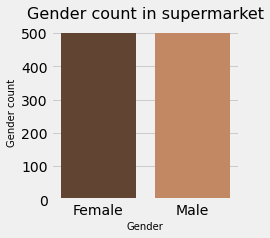

In [17]:
plt.figure(figsize=(3,3))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=data , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=10)
ax.set_ylabel(ylabel = "Gender count", fontsize = 10)
ax.set_title(label = "Gender count in supermarket", fontsize = 16)
plt.show()


Here we can see that the number of males and females entering the store is almost equal. But the visualization looks suspicious. Let’s check numeric data.

In [18]:
data.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


B. Customer type

Text(0, 0.5, 'Customer Count')

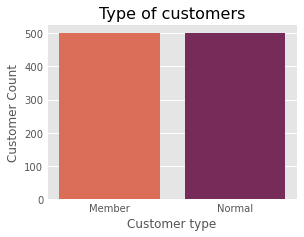

In [21]:
plt.style.use('ggplot')
plt.figure(figsize= (4,3))
ax = sns.countplot(x = "Customer type", data = data, palette = "rocket_r")
ax.set_title("Type of customers", fontsize = 16)
ax.set_xlabel("Customer type", fontsize = 12)
ax.set_ylabel("Customer Count", fontsize = 12)

The visualization looks suspicious let’s check numeric data.

In [22]:
data.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Above we can see the type of customer in all branch combined now let’s check for different branch.

Text(0, 0.5, 'Customer Count')

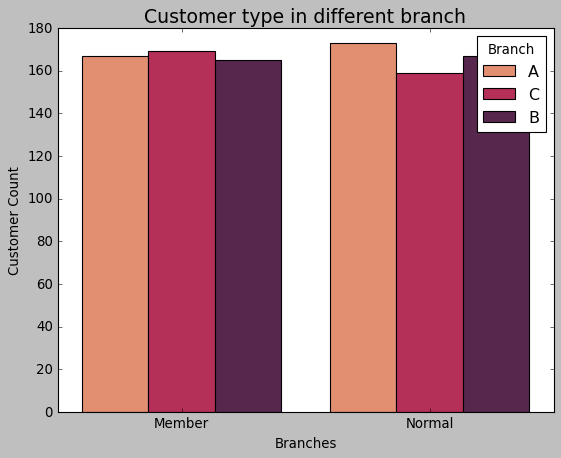

In [25]:
plt.figure(figsize=(8,6))
plt.style.use('classic')
ax = sns.countplot(x = "Customer type", hue = "Branch", data = data, palette= "rocket_r")
ax.set_title(label = "Customer type in different branch", fontsize = 17)
ax.set_xlabel(xlabel = "Branches", fontsize = 12)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 12)

C. Checking the different payment methods used.

Text(0, 0.5, ' Customer Count')

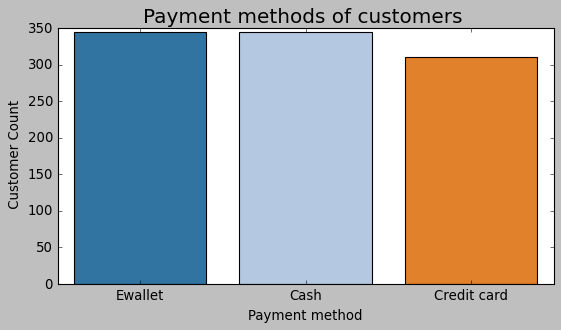

In [27]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = "Payment", data = data, palette = "tab20")
ax.set_title(label = "Payment methods of customers ", fontsize= 18)
ax.set_xlabel(xlabel = "Payment method", fontsize = 12)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 12)

D. Payment method distribution in all branches

Text(0, 0.5, 'Peple Count')

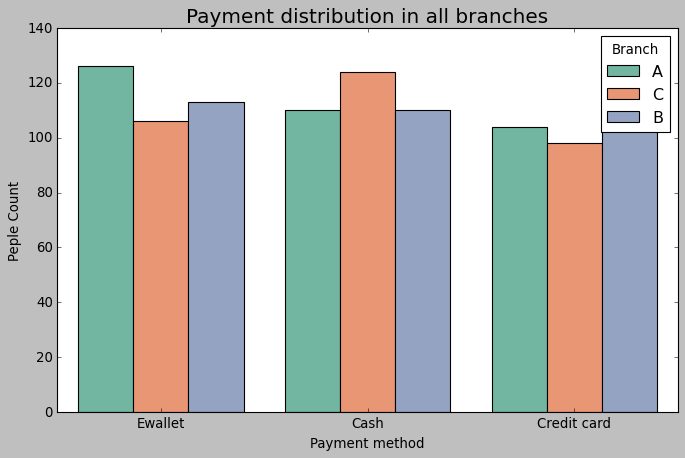

In [33]:
plt.figure(figsize = (10,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = data, palette= "Set2")
ax.set_title(label = "Payment distribution in all branches", fontsize= 18)
ax.set_xlabel(xlabel = "Payment method", fontsize = 12)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 12)

Now let’s see the rating distribution in 3 branches

Text(0, 0.5, 'Rating Distribution')

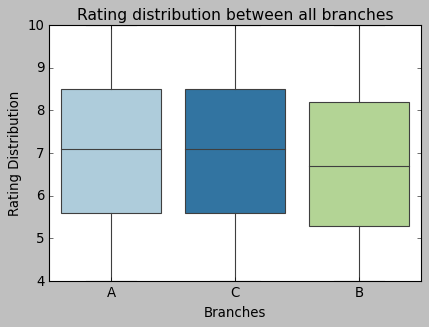

In [36]:
plt.figure(figsize = (6,4))
plt.style.use('classic')
ax = sns.boxplot(x="Branch", y = "Rating", data = data, palette= "Paired")
ax.set_title(label = "Rating distribution between all branches", fontsize= 14)
ax.set_xlabel(xlabel = "Branches", fontsize = 12)
ax.set_ylabel(ylabel = "Rating Distribution", fontsize = 12)

NOTE : We can see that the average rating of branch A and C is more than seven and branch B is less than 7.

E. Max sales time

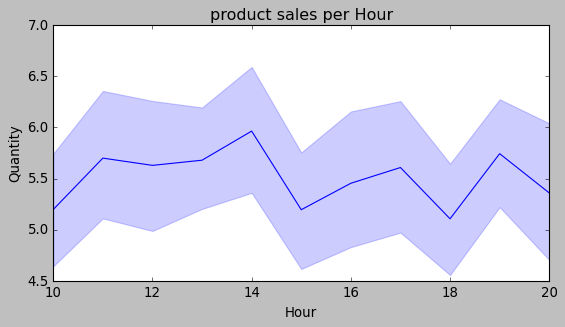

In [38]:
data["Time"]= pd.to_datetime(data["Time"])
data["Hour"]= (data["Time"]).dt.hour
plt.figure(figsize=(8,4))
plt.style.use('classic')
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = data).set_title("product sales per Hour")

We can see that the supermarket makes most of it’s sales in 14:00 hrs local time.

F. Rating vs sales

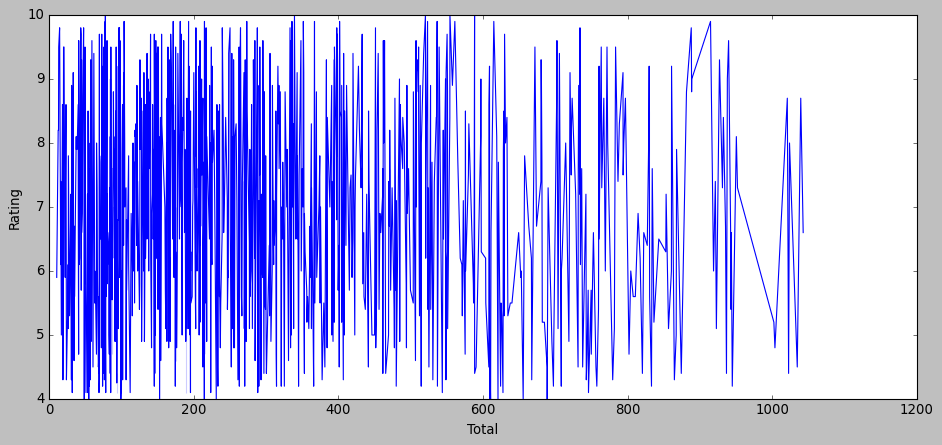

In [41]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=data)

Text(0, 0.5, 'Product Line')

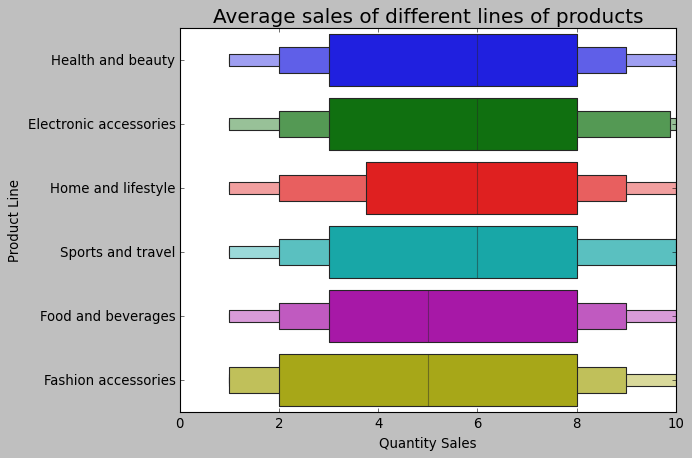

In [55]:
plt.figure(figsize=(8,6))
plt.style.use('classic')
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = data,)
ax.set_title(label = "Average sales of different lines of products", fontsize = 18)
ax.set_xlabel(xlabel = "Quantity Sales",fontsize = 12)
ax.set_ylabel(ylabel = "Product Line", fontsize = 12)

Here we can see that the average sales of different lines of products. Health and beauty making the highest sales whereas Fashon accessories making the lowest sales.

Let’s see the sales count of these products

Text(0, 0.5, 'Product Line')

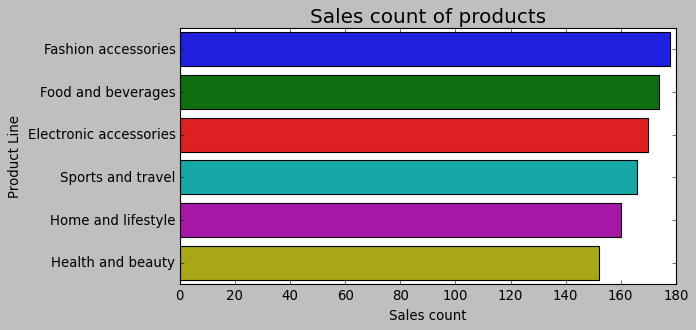

In [47]:
plt.figure(figsize=(8,4))
ax = sns.countplot(y='Product line', data=data, order = data['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 18)
ax.set_xlabel(xlabel = "Sales count", fontsize = 12)
ax.set_ylabel(ylabel= "Product Line", fontsize = 12)

We can see the top sold products form the above figure.

G. Total sales of product using boxenplot

Text(0, 0.5, 'Product Line')

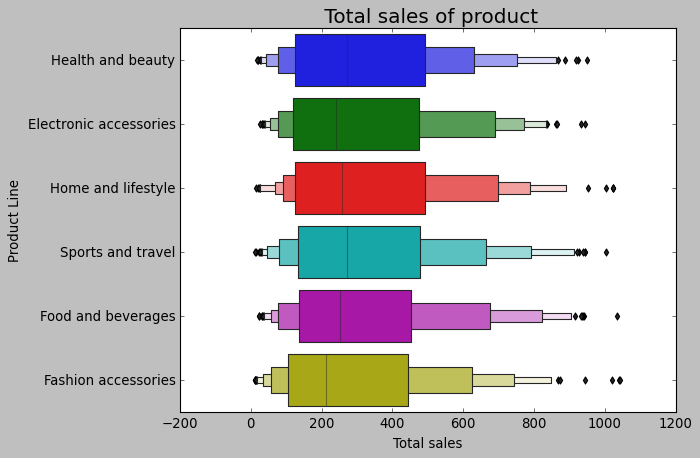

In [48]:
plt.figure(figsize=(8,6))
plt.style.use('classic')
ax = sns.boxenplot(y= "Product line", x= "Total", data = data)
ax.set_title(label = " Total sales of product", fontsize = 18)
ax.set_xlabel(xlabel = "Total sales", fontsize = 12)
ax.set_ylabel(ylabel = "Product Line", fontsize = 12)

Now let’s see average ratings of products.

Text(0, 0.5, 'Product line')

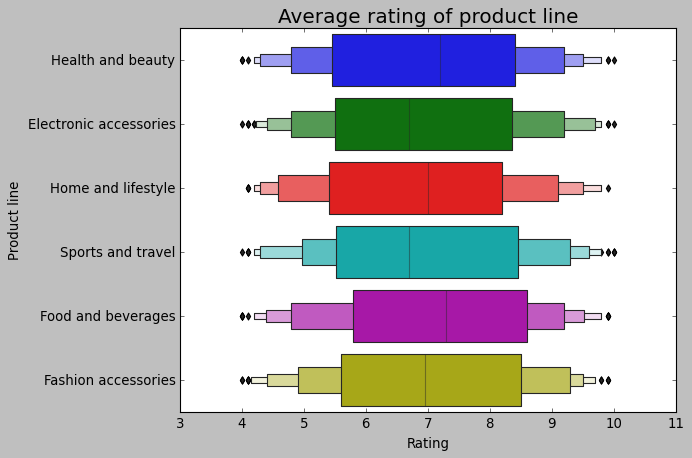

In [49]:
plt.figure(figsize = (8,6))
plt.style.use('classic')
ax = sns.boxenplot(y = "Product line", x = "Rating", data = data)
ax.set_title("Average rating of product line", fontsize = 18)
ax.set_xlabel("Rating", fontsize = 12)
ax.set_ylabel("Product line", fontsize = 12)

Product sales on the basis of gender

Text(0, 0.5, 'Product Line')

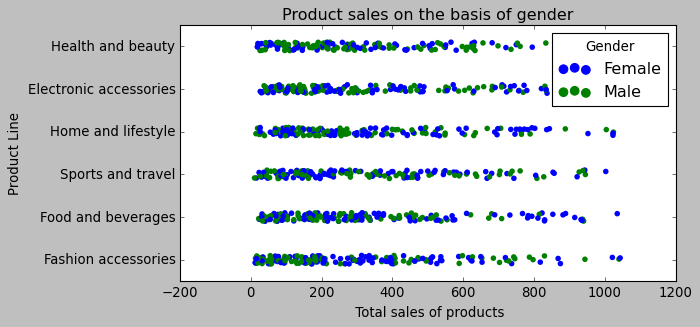

In [51]:
plt.style.use('classic')
plt.figure(figsize = (8,4))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = data)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

Product and gross income

<Figure size 640x160 with 0 Axes>

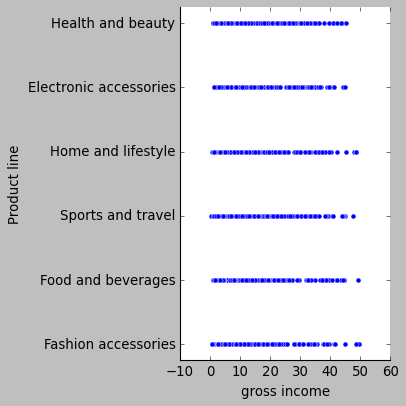

In [54]:
plt.figure(figsize = (8,2))
plt.style.use('classic')
ax = sns.relplot(y= "Product line", x = "gross income", data = data)
# ax.set_title(label = "Products and Gross income")
# ax.set_xlabel(xlabel = "Total gross income")
# ax.set_ylabel(ylabel = "Product line")